In [1]:
import requests
import tensorflow as tf
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import os
from PIL import Image
from io import BytesIO

In [2]:
base_path = 'dataset/'
train_dir = os.path.join(base_path, 'train')
diseases = os.listdir(train_dir)

label = []
for dis in diseases:
    label.append(dis)

In [3]:
label

['bacterial_leaf_blight',
 'bacterial_leaf_streak',
 'bacterial_panicle_blight',
 'blast',
 'brown_spot',
 'dead_heart',
 'downy_mildew',
 'hispa',
 'normal',
 'tungro']

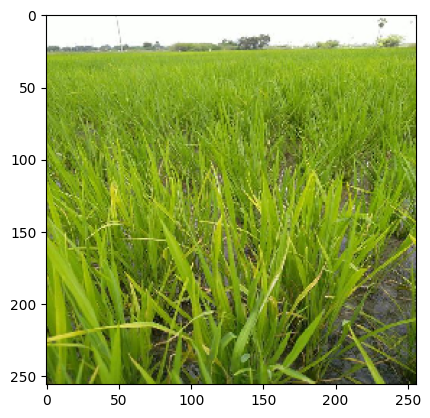

(1, 256, 256, 3)


In [6]:
predict_img = load_img('dataset/val/downy_mildew/100891.jpg', target_size = (256, 256))

plt.imshow(predict_img)
plt.show()

predict_img = img_to_array(predict_img)
predict_img = np.expand_dims(predict_img, 0)

print(predict_img.shape)

In [7]:
json_data = json.dumps(
    {
        "instances": predict_img.tolist()
    }
)

# local
# endpoint = "http://localhost:8501/v1/models/harvestia:predict"

# via external IP
endpoint = "http://34.128.103.131:8501/v1/models/harvestia:predict"

response = requests.post(endpoint, data=json_data)
print(response.json()["predictions"][0])
prediction = tf.argmax(response.json()["predictions"][0]).numpy()
print(label[prediction])

[0.0396531, 0.0034584906, 0.00475356309, 0.0593003631, 0.347757667, 0.00367112388, 0.434888572, 0.0824262351, 0.012242496, 0.0118484907]
downy_mildew
